In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
df = pd.read_csv(r'D:\航海\船舶停留轨迹分类模块\TrainingData\trainingData', header=None, engine="python")
df.dropna(inplace=True)
df.columns = ['status', 'stay-time', 'Aspect-ratio', 'Density', 'Dis Variance', 'Velocity Mean', 'Velocity Variance',
              'a-Variance', 'maxDis', 'head-Variance', 'Class label']
df.head(5)

,status,stay-time,Aspect-ratio,Density,Dis Variance,Velocity Mean,Velocity Variance,a-Variance,maxDis,head-Variance,Class label
0,1.0,5.520556,8.594854,0.024205,3.278965,0.014234,0.008460,0.000056,167.689320,32.164128,1
1,1.0,3.850833,3.030676,0.051397,5.937132,0.034289,0.027529,0.000134,66.725869,5.636387,1
2,1.0,3.850556,6.788039,0.041447,3.433945,0.023077,0.014594,0.000103,110.791868,7.544310,1
3,1.0,4.348889,6.200071,0.011759,7.810434,0.029176,0.024673,0.000097,192.090427,9.990709,1
4,1.0,2.199444,2.410629,0.044884,5.714460,0.033267,0.025093,0.000141,45.923765,4.390358,1


In [4]:
import xgboost as xgb
import pandas as pd
import numpy as np

In [4]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate
from sklearn.metrics import accuracy_score
X = df.iloc[:, 0:10].values
y = df.iloc[:, 10].values
seed = 0
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
model = XGBClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

print('***********')
scores = cross_val_score(model, X, y, cv=10)
print(scores)  # 打印输出每次迭代的度量值（准确度）
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))  # 获取置信区间。（也就是均值和方差）

0.9573992647588841
***********
[0.97708108 0.95718919 0.97405405 0.97902703 0.96366782 0.95112457
 0.92949827 0.90333045 0.93987889 0.96582306]
Accuracy: 0.95 (+/- 0.05)


In [5]:
df = pd.read_csv(r'D:\航海\船舶停留轨迹分类模块\TrainingData\trainingData', header=None, engine="python")
X = df.iloc[:,0:10]
y = df.iloc[:,10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = XGBClassifier(learning_rate=0.13, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8).fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)


print('***********')
scores = cross_val_score(model, X_train, y_train, cv=10)
print(scores)  # 打印输出每次迭代的度量值（准确度）
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))  # 获取置信区间。（也就是均值和方差）
print()
scores = cross_val_score(model, X_train, y_train, cv=10)  
print('准确率：',np.mean(scores), scores)  
precisions = cross_val_score(model, X_train, y_train, cv=10, scoring='precision')  
print('精确率：', np.mean(precisions), precisions)  
recalls = cross_val_score(model, X_train, y_train, cv=10, scoring='recall')  
print('召回率：', np.mean(recalls), recalls)  
f1s = cross_val_score(model, X_train, y_train, cv=10, scoring='f1')  
print('综合评价指标：', np.mean(f1s), f1s)  

#Best: -0.085359 using {'learning_rate': 0.13, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
###########################################

0.9643912636055648
***********
[0.96633725 0.96633725 0.96756256 0.96416435 0.96076614 0.97405005
 0.95891257 0.97003398 0.96569839 0.96291718]
Accuracy: 0.966 (+/- 0.008)

准确率： 0.9656779716121212 [0.96633725 0.96633725 0.96756256 0.96416435 0.96076614 0.97405005
 0.95891257 0.97003398 0.96569839 0.96291718]
精确率： 0.9701931978425448 [0.96706915 0.97172949 0.97653631 0.97004992 0.96674058 0.97575758
 0.96353591 0.97611111 0.97011621 0.96428571]
召回率： 0.9684118233874633 [0.97294313 0.9679735  0.96521259 0.96576477 0.96300387 0.97791276
 0.96300387 0.97018222 0.96850829 0.96961326]
综合评价指标： 0.9692952900335594 [0.96999725 0.96984786 0.97084143 0.9679026  0.9648686  0.97683398
 0.96326981 0.97313764 0.96931158 0.96694215]


In [7]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
df = pd.read_csv(r'D:\航海\船舶停留轨迹分类模块\TrainingData\trainingData', header=None, engine="python")
X = df.iloc[:,0:10]
y = df.iloc[:,10]
model = XGBClassifier()
param_grid = dict(learning_rate=[0.13], n_estimators=[100], max_depth=[7], min_child_weight=[3], subsample=[0.8])
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold) #n_jobs: 并行数，int：个数,-1：跟CPU核数一致, 1:默认值
grid_result = grid_search.fit(X_train, y_train)
y_pred = grid_result.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

pred = grid_result.predict(X_test)
print("最优测试集验证得分:"+str(np.mean(pred == y_test)))
#############################################################################################################
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f  with: %r" % (mean, param))

0.9643912636055648
最优测试集验证得分:0.9643912636055648
Best: -0.089602 using {'learning_rate': 0.13, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
-0.089602  with: {'learning_rate': 0.13, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}


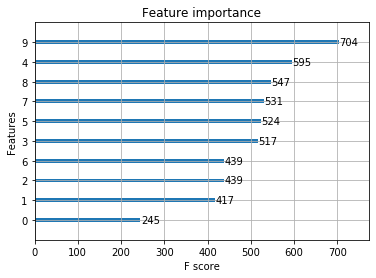

In [8]:
import pandas as pd
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
df = pd.read_csv(r'D:\航海\船舶停留轨迹分类模块\TrainingData\trainingData', header=None, engine="python")
X = df.iloc[:, 0:10]
y = df.iloc[:, 10]
model = XGBClassifier(learning_rate=0.2, n_estimators=100, max_depth=7, min_child_weight=3, subsample=0.8)
model.fit(X, y)
plot_importance(model)
pyplot.savefig('lena_new_sz.png')
pyplot.show()
######################################################
# df.columns = ['status0', 'stay-time1', 'Aspect-ratio2', 'Density3', 'Dis Variance4', 'Velocity Mean5', 'Velocity Variance6',
#               'a-Variance7', 'maxDis8', 'head-Variance9', 'Class label']

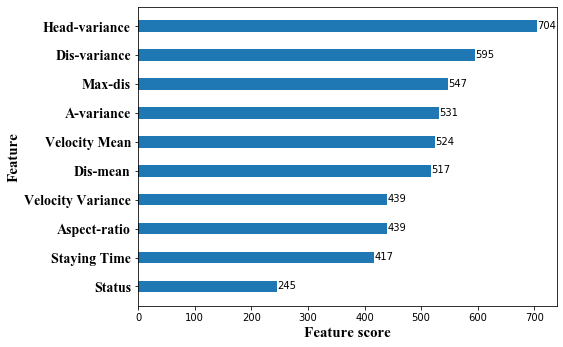

In [23]:
from pylab import mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot
#mpl.rcParams['font.sans-serif'] = ['Times New Roman'] # 指定默认字体
#mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
#mpl.rc_params['font.size'] = 10
num_list = [245, 417, 439, 439, 517, 524, 531, 547, 595, 704]
name_list = ['Head-variance', 'Dis-variance', 'Max-dis', 'A-variance', 'Velocity Mean', 'Dis-mean', 'Velocity Variance', 'Aspect-ratio', 'Staying Time', 'Status']
name_list = name_list[::-1]
#name_list = ['航行状态', '停留时长', '体态比', '速度方差', '平均距离', '速度均值', '加速度方差', '最远点集对距离', '距离方差', '航首向标准差']
plt.figure(figsize=(7.5,5.5))
plt.barh(range(len(num_list)), num_list, tick_label=name_list, height=0.4)
for y, x in enumerate(num_list):
    plt.text(x+18, y-0.3/2, '%s' % x, ha='center', va='bottom')
#plt.xlabel("特征得分")
plt.xlabel("Feature score", fontproperties = 'Times New Roman', size = 15)
plt.ylabel("Feature", fontproperties = 'Times New Roman',size = 15)
plt.yticks(fontproperties = 'Times New Roman', size = 14)
pyplot.savefig('lena_new_sz.png', bbox_inches = 'tight', dpi=500)
plt.show()

In [12]:
X = df.iloc[:, 0:10].values
y = df.iloc[:, 10].values
seed = 0
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set=eval_set, verbose=True)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(accuracy)


[0]	validation_0-logloss:0.621783
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.563409
[2]	validation_0-logloss:0.514677
[3]	validation_0-logloss:0.473574
[4]	validation_0-logloss:0.43871
[5]	validation_0-logloss:0.409198
[6]	validation_0-logloss:0.383195
[7]	validation_0-logloss:0.359505
[8]	validation_0-logloss:0.339601
[9]	validation_0-logloss:0.321335
[10]	validation_0-logloss:0.305771
[11]	validation_0-logloss:0.290304
[12]	validation_0-logloss:0.277827
[13]	validation_0-logloss:0.266688
[14]	validation_0-logloss:0.255192
[15]	validation_0-logloss:0.245138
[16]	validation_0-logloss:0.236365
[17]	validation_0-logloss:0.22819
[18]	validation_0-logloss:0.22097
[19]	validation_0-logloss:0.214248
[20]	validation_0-logloss:0.208457
[21]	validation_0-logloss:0.202686
[22]	validation_0-logloss:0.197824
[23]	validation_0-logloss:0.192627
[24]	validation_0-logloss:0.188266
[25]	validation_0-logloss:0.18382
[26]	validation_0-logloss:0.180384
[

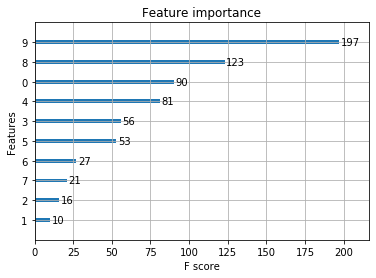

In [13]:
import pandas as pd
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
df = pd.read_csv(r'D:\航海\船舶停留轨迹分类模块\TrainingData\trainingData', header=None, engine="python")
X = df.iloc[:, 0:10]
y = df.iloc[:, 10]
model = XGBClassifier()
model.fit(X, y)
plot_importance(model)
pyplot.show()

In [14]:
df.columns = ['status', 'stay-time', 'Aspect-ratio', 'Density', 'Dis Variance', 'Velocity Mean', 'Velocity Variance',
              'a-Variance', 'maxDis', 'head-Variance', 'Class label']

In [15]:
xgb1 = XGBClassifier(
 learning_rate =0.1,  #学习率，过大收敛不了，小了收敛慢**************
 n_estimators=1000,   #树的个数
 max_depth=5,  #构建树的深度，越大越容易过拟合，可以用CV函数来进行调优***************
 min_child_weight=1,  #值越大，越容易欠拟合；值越小，越容易过拟合*****************
 gamma=0,  #树的叶子节点上作进一步分区所需的最小损失减少,越大越保守，一般0.1、0.2这样子
 subsample=0.8,  #随机采样训练样本 训练实例的子采样比，典型值的范围在0.5-0.9之间
 colsample_bytree=0.8,  #生成树时进行的列采样 同subsample，一般在0.5-0.9
 objective= 'binary:logistic',  
 nthread=4,  # cpu 线程数 默认最大
 scale_pos_weight=1,  #如果取值大于0的话，在类别样本不平衡的情况下有助于快速收敛
 seed=27)

In [16]:
# Tune learning_rate
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# load data
df = pd.read_csv(r'D:\航海\船舶停留轨迹分类模块\TrainingData\trainingData', header=None, engine="python")
# split data into X and y
X = df.iloc[:,0:10]
Y = df.iloc[:,10]
# grid search
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate, n_estimators=[10, 50, 100], max_depth=np.arange(3, 8), min_child_weight=np.arange(3, 8), subsample=np.arange(5, 9)/10)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold) #n_jobs: 并行数，int：个数,-1：跟CPU核数一致, 1:默认值
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f  with: %r" % (mean, param))

Best: -0.086008 using {'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
-0.692402  with: {'learning_rate': 0.0001, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 10, 'subsample': 0.5}
-0.692402  with: {'learning_rate': 0.0001, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 10, 'subsample': 0.6}
-0.692402  with: {'learning_rate': 0.0001, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 10, 'subsample': 0.7}
-0.692402  with: {'learning_rate': 0.0001, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 10, 'subsample': 0.8}
-0.689434  with: {'learning_rate': 0.0001, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.5}
-0.689434  with: {'learning_rate': 0.0001, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.6}
-0.689435  with: {'learning_rate': 0.0001, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.7}
-0.689435  with: {'learning_rate': 0.